### setup

In [83]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/achtmhz/venv/data-hacks/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['trace', 'flatten', 'pi', 'array', 'trunc', 'poly', 'vectorize', 'solve', 'beta', 'transpose', 'add', 'sign', 'det', 'cosh', 'take', 'sinc', 'source', 'deprecated', 'product', 'exp', 'log', 'cbrt', 'interactive', 'conjugate', 'binomial', 'Line2D', 'nan', 'var', 'mod', 'test', 'tanh', 'ones', 'sqrt', 'Circle', 'plotting', 'seterr', 'cos', 'invert', 'reshape', 'sinh', 'Polygon', 'power', 'multinomial', 'plot', 'roots', 'gamma', 'diff', 'eye', 'floor', 'zeros', 'prod', 'sin', 'diag', 'tan']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [84]:
import pandas as pd

In [85]:
from sympy import *
init_printing()

In [86]:
x, y, z = symbols('x y z')
h = symbols('h')
n, m = symbols('n m', integer=True)

### a few difference quotients of monomials

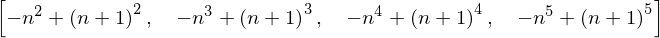

In [87]:
dq_mono = [( ((n+h)**i - n**i) / ((n+h) - n) ).subs(h, 1) for i in range(2,6)]
dq_mono

#### 

In [88]:
dq_mono_sample = [[dq.subs(n, i) for i in range(-6,6)] for dq in dq_mono]
pd.DataFrame(dq_mono_sample, columns=range(-6,6))

,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5
0,-11,-9,-7,-5,-3,-1,1,3,5,7,9,11
1,91,61,37,19,7,1,1,7,19,37,61,91
2,-671,-369,-175,-65,-15,-1,1,15,65,175,369,671
3,4651,2101,781,211,31,1,1,31,211,781,2101,4651


In [89]:
[expand(dq) for dq in dq_mono]

In [95]:
func_table = [(i**2, dq_mono[0].subs(n,i), i**2 + dq_mono[0].subs(n,i)) for i in range(0,6)]
pd.DataFrame(func_table, columns=["n^2", "dq", "(n+1)^2"])

,n^2,dq,(n+1)^2
0,0,1,1
1,1,3,4
2,4,5,9
3,9,7,16
4,16,9,25
5,25,11,36


#### 

In [91]:
dq_mono_diff = [np.diff(sample) for sample in dq_mono_sample]
pd.DataFrame(dq_mono_diff, columns=range(-6,5))

,-6,-5,-4,-3,-2,-1,0,1,2,3,4
0,2,2,2,2,2,2,2,2,2,2,2
1,-30,-24,-18,-12,-6,0,6,12,18,24,30
2,302,194,110,50,14,2,14,50,110,194,302
3,-2550,-1320,-570,-180,-30,0,30,180,570,1320,2550


In [92]:
dq_mono_second_diff = [np.diff(sample) for sample in dq_mono_diff]
pd.DataFrame(dq_mono_second_diff, columns=range(-6,4))

,-6,-5,-4,-3,-2,-1,0,1,2,3
0,0,0,0,0,0,0,0,0,0,0
1,6,6,6,6,6,6,6,6,6,6
2,-108,-84,-60,-36,-12,12,36,60,84,108
3,1230,750,390,150,30,30,150,390,750,1230


In [93]:
dq_mono_third_diff = [np.diff(sample) for sample in dq_mono_second_diff]
pd.DataFrame(dq_mono_third_diff, columns=range(-6,3))

,-6,-5,-4,-3,-2,-1,0,1,2
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,24,24,24,24,24,24,24,24,24
3,-480,-360,-240,-120,0,120,240,360,480
